**Importing Libraries**

In [ ]:
!pip install contractions
!pip install mglearn
!pip install gensim
import pandas as pd
pd.set_option("display.max_colwidth", 200)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

**Importing Dataset**

In [ ]:
data = pd.read_csv('tweets.csv')
data.head()
## 0 refers to positive sentiment, 1 is negative sentiment

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [ ]:
# check for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
# drop the id column
# data.drop(['id'], axis=1, inplace=True)
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [ ]:
# Check for the class balance
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: >

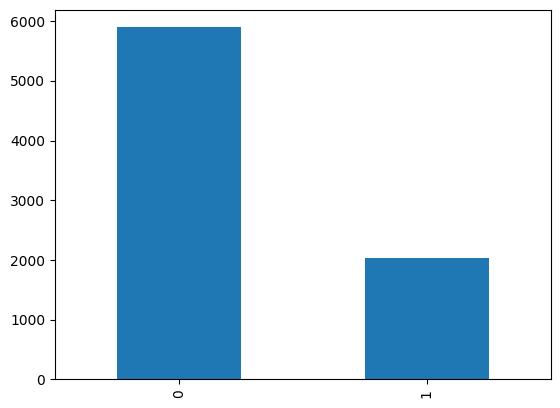

In [ ]:
# plot the label counts
data['label'].value_counts().plot(kind='bar')

#2. Data Cleaning


In [ ]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
import re
# Substitute 's with " is"
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [ ]:
# Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [ ]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [ ]:
# remive the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
re.sub("#", "", data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [ ]:
# Removing the hyperlinks
re.sub(r"http\S+", "", data['tweet'][0])


'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [ ]:
re.sub(r"[^a-zA-Z]", " ", data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [ ]:
# Stop words Removal

from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'no', 'as', 'into', 'from', 'again', 'more', "aren't", "doesn't", 'any', "you're", 'me', 'should', 'had', 'on', 'm', 've', 'won', 'themselves', 's', 'not', "should've", 'shan', 'how', 'be', "you'll", 'y', "wouldn't", 'didn', 'myself', 'yourselves', 'in', 'doing', 'by', 'an', 'off', 'does', 'down', 'the', 'that', 'was', 'who', 'have', 'over', 'aren', 'than', 'being', 'during', 'were', 'you', 'those', 'whom', 'some', 't', 'most', 'too', 'all', 'hers', 'he', "that'll", 'before', 'needn', 'only', 'my', 'out', 'can', "haven't", 'a', 'our', 'between', 'mustn', 'then', 'what', 'him', 'doesn', 'now', 'did', 'own', 'so', 'are', 'weren', 'and', 'here', 'when', 'mightn', 'which', 'ourselves', 'there', 'above', 'or', 'up', 'don', 'this', 'having', 'yourself', 'their', 'such', 'but', 'nor', 'after', 'himself', 'been', "she's", 'with', 'i', 'through', 'yours', "shan't", 'until', "it's", 'at', 'about', 'both', 'shouldn', 'of', 'them', 'because', 'do', "hadn't", 'just', 'these', 'for', 'she', 'her', 

In [ ]:
len(nltk_stopwords)

179

In [ ]:

sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'no', 'as', 'cry', 'from', 'more', 'thereafter', 'alone', 'hereafter', 'un', 'me', 'every', 'had', 'themselves', 'whose', 'interest', 'not', 'show', 'get', 'nowhere', 'thick', 'be', 'seems', 'becoming', 'thereby', 'by', 'us', 'part', 'off', 'that', 'however', 'was', 'have', 'over', 'during', 'beforehand', 'side', 'whom', 'some', 'besides', 'onto', 'most', 'too', 'hers', 'whole', 'he', 'my', 'latter', 'then', 'move', 'anyway', 'now', 'everything', 'always', 'somehow', 'already', 'are', 'when', 'de', 'there', 'ourselves', 'none', 'eight', 'or', 'may', 'beside', 'yourself', 'never', 'but', 'almost', 'go', 'throughout', 'amoungst', 'after', 'himself', 'indeed', 'ltd', 'without', 'wherein', 'also', 'with', 'i', 'done', 'behind', 'both', 'bill', 'third', 'because', 'them', 'together', 'whatever', 'find', 'per', 'these', 'for', 'last', 'give', 'other', 'top', 'name', 'they', 'anyone', 'amongst', 'others', 'anyhow', 'serious', 'your', 'another', 'even', 'couldnt', 'neither', 'ours', 'else', '

In [ ]:
len(sklearn_stopwords)

318

In [ ]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'no', 'as', 'from', 'into', 'again', 'more', 'any', 'should', 'me', 'had', 'on', 'themselves', 'not', 'how', 'be', 'myself', 'yourselves', 'in', 'by', 'an', 'off', 'down', 'the', 'that', 'was', 'who', 'have', 'over', 'than', 'during', 'being', 'were', 'you', 'those', 'whom', 'some', 'most', 'too', 'all', 'hers', 'he', 'before', 'only', 'my', 'out', 'can', 'a', 'our', 'between', 'then', 'what', 'him', 'now', 'own', 'so', 'are', 'and', 'here', 'when', 'which', 'ourselves', 'there', 'above', 'or', 'up', 'this', 'yourself', 'their', 'such', 'but', 'nor', 'after', 'himself', 'been', 'with', 'i', 'through', 'yours', 'until', 'at', 'about', 'both', 'of', 'them', 'because', 'do', 'these', 'for', 'she', 'her', 'other', 'they', 'few', 'once', 'am', 'his', 'under', 'your', 'ours', 'it', 'itself', 'herself', 'further', 'its', 'while', 'why', 'has', 'will', 're', 'to', 'where', 'each', 'below', 'same', 'against', 'if', 'we', 'very', 'is'}


In [ ]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [ ]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [ ]:
len(combined_stopwords)

378

In [ ]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [ ]:
new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [ ]:
import contractions
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

#Definining and applying the Cleaner Function

In [ ]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    for token in tokens:
        cleaned_text += lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
cleaned_tweets = []  # list of cleaned tweets

for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

# Assuming tweet_cleaner_without_stopwords is a function that returns cleaned_text
# Make sure to define and use this function before running the code above


In [ ]:
cleaned_tweets[:5]

['# fingerprint # Pregnancy Test http : //goo.gl/h1MfQV # android # apps # beautiful # cute # health # igers # iphoneonly # iphonesia # iphone ',
 'Finally a transparant silicon case ^^ Thanks to my uncle : ) # yay # Sony # Xperia # S # sonyexperias… http : //instagram.com/p/YGEt5JC6JM/ ',
 'We love this ! Would you go ? # talk # makememories # unplug # relax # iphone # smartphone # wifi # connect ... http : //fb.me/6N3LsUpCu ',
 "I 'm wired I know I 'm George I wa made that way ; ) # iphone # cute # daventry # home http : //instagr.am/p/Li_5_ujS4k/ ",
 "What amazing service ! Apple wo n't even talk to me about a question I have unless I pay them $ 19.95 for their stupid support ! "]

In [ ]:
cleaned_tweets[24]

"It 's time for new wallpaper # phone # wallpaper # wall # screen # galaxy # samsung # app … http : //www.instagram.com/p/BcsKTNNn51c/ "

In [ ]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [ ]:
data['tweet'][1500].split()

['#Apple',
 'Bunch',
 'if',
 'Crooks',
 'Refused',
 'to',
 'repair/replace',
 'my',
 'beats',
 'wireless.',
 'Problem',
 'rubber',
 'on',
 'mic',
 'coming',
 'off',
 'microphones',
 'stopped',
 'working.',
 'Said',
 'warranty',
 'was',
 'void',
 'because',
 'ear',
 'piece',
 'looked',
 'chewed.',
 'Bullshit.',
 'I',
 'don’t',
 'have',
 'any',
 'animals',
 'and',
 'I',
 'would',
 'chew',
 'on',
 'anything',
 'I',
 'put',
 'in',
 'my',
 'ear.',
 'pic.twitter.com/GfgvquEpuC']

In [ ]:
cleaned_tweets[1500]

'# Apple Bunch if Crooks Refused to repair/replace my beat wireless . Problem rubber on mic coming off microphone stopped working . Said warranty wa void because ear piece looked chewed . Bullshit . I don ’ t have any animal and I would chew on anything I put in my ear . pic.twitter.com/GfgvquEpuC '

In [ ]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,# fingerprint # Pregnancy Test http : //goo.gl/h1MfQV # android # apps # beautiful # cute # health # igers # iphoneonly # iphonesia # iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle : ) # yay # Sony # Xperia # S # sonyexperias… http : //instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this ! Would you go ? # talk # makememories # unplug # relax # iphone # smartphone # wifi # connect ... http : //fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I 'm wired I know I 'm George I wa made that way ; ) # iphone # cute # daventry # home http : //instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service ! Apple wo n't even talk to me about a question I have unless I pay them $ 19.95 for their stupid support !


#3. Data Visualization

In [ ]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['tweet']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

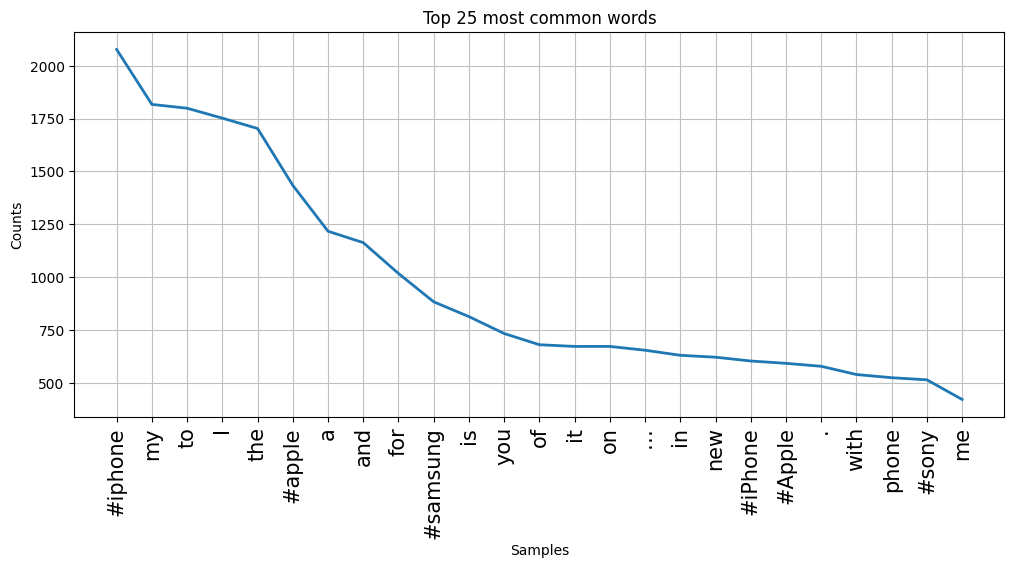

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

#Plot for Cleaned Tweets

In [ ]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['#', 'fingerprint', '#', 'Pregnancy', 'Test', 'http', ':', '//goo.gl/h1MfQV', '#', 'android', '#', 'apps', '#', 'beautiful', '#', 'cute', '#', 'health', '#', 'igers', '#', 'iphoneonly', '#', 'iphonesia', '#', 'iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':', ')', '#', 'yay', '#', 'Sony', '#', 'Xperia', '#', 'S', '#', 'sonyexperias…', 'http', ':']


In [ ]:
len(set(all_words)) # this is the number of unique words in the list

26657

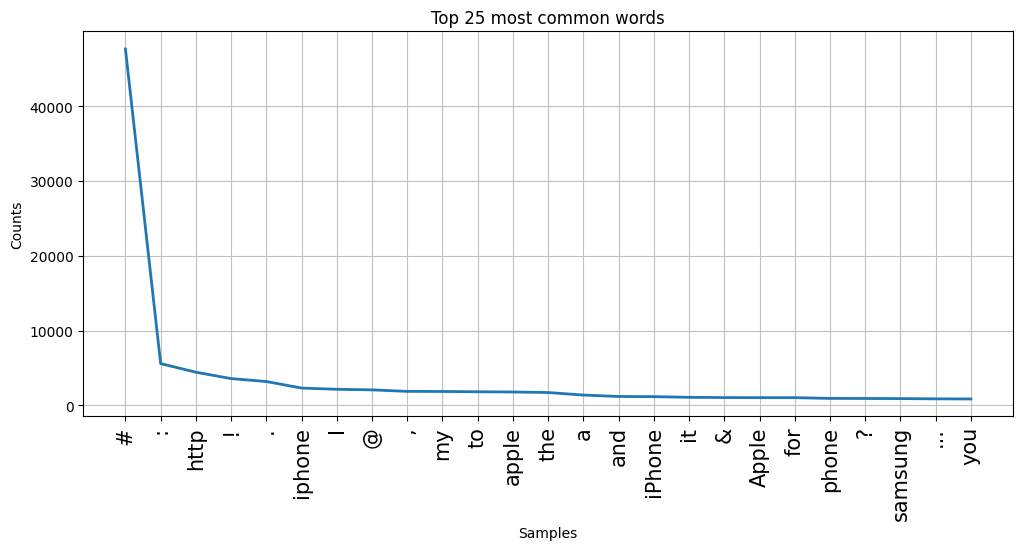

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

#DV After applying Stop words

In [ ]:
type(combined_stopwords)

set

In [ ]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [ ]:
data.columns

Index(['id', 'label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [ ]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,# fingerprint # Pregnancy Test http : //goo.gl/h1MfQV # android # apps # beautiful # cute # health # igers # iphoneonly # iphonesia # iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle : ) # yay # Sony # Xperia # S # sonyexperias… http : //instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this ! Would you go ? # talk # makememories # unplug # relax # iphone # smartphone # wifi # connect ... http : //fb.me/6N3LsUpCu,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I 'm wired I know I 'm George I wa made that way ; ) # iphone # cute # daventry # home http : //instagr.am/p/Li_5_ujS4k/,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service ! Apple wo n't even talk to me about a question I have unless I pay them $ 19.95 for their stupid support !,amazing service apple talk question unless pay stupid support


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


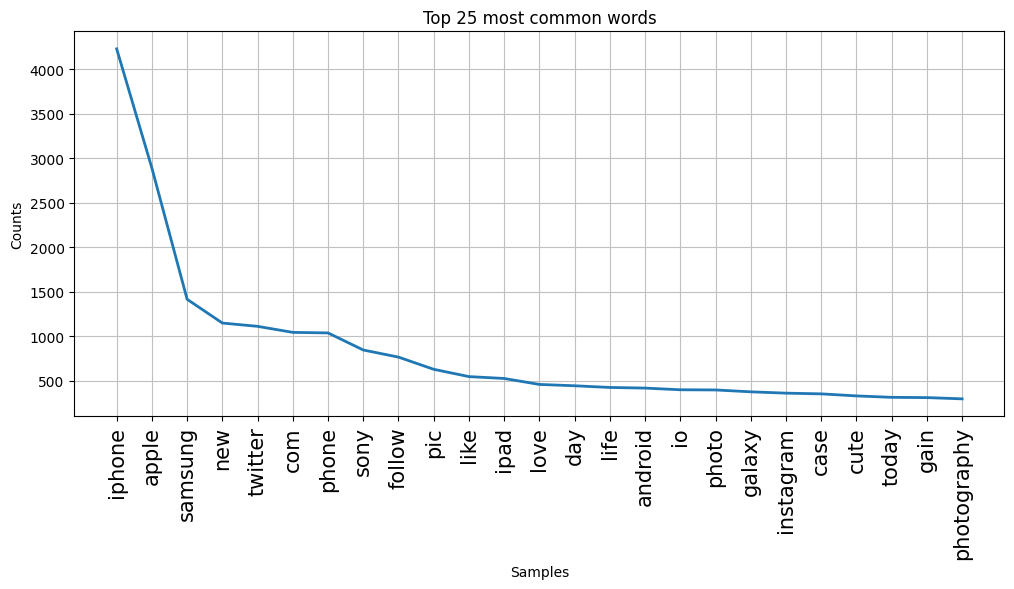

In [ ]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [ ]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [ ]:
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,# fingerprint # Pregnancy Test http : //goo.gl/h1MfQV # android # apps # beautiful # cute # health # igers # iphoneonly # iphonesia # iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle : ) # yay # Sony # Xperia # S # sonyexperias… http : //instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this ! Would you go ? # talk # makememories # unplug # relax # iphone # smartphone # wifi # connect ... http : //fb.me/6N3LsUpCu,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I 'm wired I know I 'm George I wa made that way ; ) # iphone # cute # daventry # home http : //instagr.am/p/Li_5_ujS4k/,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service ! Apple wo n't even talk to me about a question I have unless I pay them $ 19.95 for their stupid support !,amazing service apple talk question unless pay stupid support


#4. Bag of Words Model (Feature Extraction)

*   Countvectorizer
TF-IDF Vectorizer
*   List item



In [ ]:
data.shape

(7920, 5)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])

In [ ]:
CV_features.shape

(7920, 22628)

In [ ]:
CV_features[0]

<1x22628 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
type(CV_features[0])  # each row is a compressed spare row

scipy.sparse._csr.csr_matrix

In [ ]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df
# Document-Term-Matrix X = [N x p ]
# N = no. of documentns
# p = no. of unique words in the vocab!!# this is your D

,0,1,2,3,4,5,6,7,8,9,...,22618,22619,22620,22621,22622,22623,22624,22625,22626,22627
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.size/1e6  # these many elements/numbers are presnt in the df

179.21376

In [ ]:
import numpy as np
np.count_nonzero(df)

137165

In [ ]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.0765370917947372

In [ ]:
print(CV.get_feature_names_out()[:50])  # these are the vocab words


['00' '000' '002' '004' '0051' '007' '00am' '00pm' '01' '010111' '010315'
 '011' '01108nartl' '01204' '01634' '01924' '01am' '01amapril' '01amjune'
 '01ammay' '01pm' '01pmapril' '01pmjune' '02' '02pyow4aag' '03'
 '035glzwp4r' '04' '0490love' '04t81f' '05' '06' '07' '0777' '07yilmaz242'
 '08' '08184820028' '08t' '09' '09c753e42b04cafb66bb5676049a7cb8' '0_rzrw'
 '0bao3i' '0bfnzanwty' '0cmcjv1vdj' '0d9dzq0cxo' '0dpfyzp4au' '0dythia5w0'
 '0ey7tmubxe' '0eyq6dwgxy' '0fcbzlaj9i']


In [ ]:
CV_features[10].todense()  # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the

[array(['2inches', 'apple', 'color', 'crash', 'dont', 'every', 'five',
        'fuckin', 'hey', 'ipod', 'it', 'make', 'minite', 'new', 'not',
        'or', 'thinner', 'when', 'you'], dtype='<U54')]

**Logistic Model**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)

0.9843434343434343
0.8883838383838384


**Cross Validation of logistic model**

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
X = CV_features
y = data['label']
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

# your's accuracy = 88.23 +/- 0.93 %

[0.88068182 0.87815657 0.88257576 0.8895202  0.89330808]
88.48 0.57


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)
#Results
results


{'fit_time': array([0.08203506, 0.07343769, 0.20661402, 0.13920617, 0.20699239]),
 'score_time': array([0.00205612, 0.00408506, 0.00746918, 0.0242362 , 0.00196528]),
 'test_score': array([0.88068182, 0.87815657, 0.88257576, 0.8895202 , 0.89330808]),
 'train_score': array([0.90230429, 0.90230429, 0.90135732, 0.89962121, 0.8989899 ])}

In [ ]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))


[0.90230429 0.90230429 0.90135732 0.89962121 0.8989899 ]
90.09 0.14


In [ ]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))


[0.88068182 0.87815657 0.88257576 0.8895202  0.89330808]
88.48 0.57


#Hyper Parameter tunning of Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_


({'C': 0.95001}, 0.8897727272727274, 19)

In [ ]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

88.97727272727273

In [ ]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!


93.15656565656566

In [ ]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.7104446917492524

In [ ]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.85909091, 0.86881313, 0.87474747, 0.87979798,
       0.88055556, 0.88156566, 0.88409091, 0.88484848, 0.88573232,
       0.88598485, 0.88737374, 0.88724747, 0.88838384, 0.88914141,
       0.88914141, 0.88901515, 0.88939394, 0.88926768, 0.88977273])

In [ ]:
grid_results.cv_results_['mean_train_score']

array([0.74419192, 0.86041667, 0.87354798, 0.88061869, 0.88617424,
       0.89068813, 0.89403409, 0.89763258, 0.9009154 , 0.90429293,
       0.90741793, 0.91120581, 0.91366793, 0.91669823, 0.91922348,
       0.9219697 , 0.92443182, 0.92695707, 0.92900884, 0.93156566])

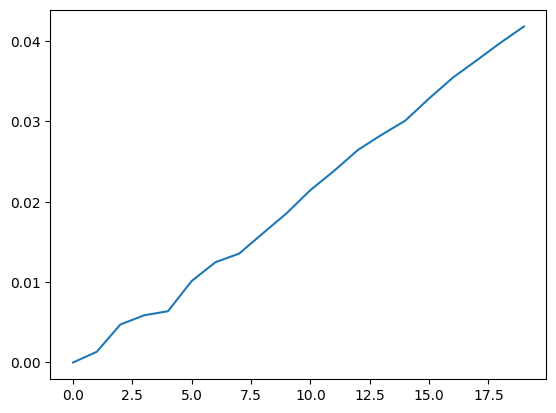

In [ ]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [ ]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [ ]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [ ]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']


array([-1.11022302e-16,  1.32575758e-03,  4.73484848e-03,  5.87121212e-03,
        6.37626263e-03,  1.01325758e-02,  1.24684343e-02,  1.35416667e-02,
        1.60669192e-02,  1.85606061e-02,  2.14330808e-02,  2.38320707e-02,
        2.64204545e-02,  2.83143939e-02,  3.00820707e-02,  3.28282828e-02,
        3.54166667e-02,  3.75631313e-02,  3.97411616e-02,  4.17929293e-02])

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

88.48 0.57


In [ ]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [ ]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [ ]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2


22628

#6. LR Model without vs with stop_words

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

87.29 0.46


22335

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

87.17 0.49


1253

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

86.79 0.5


300

#7. TF-IDF Vector BoW Model + Logistic Regression

In [ ]:
doc1 = 'I love cooking'
doc2 = 'Today I cooked pasta today'

In [ ]:
# TF_score = how many times a word (from the vocab) is appearing in a given doc / total no. of words in that doc
# TF(today | doc2) = 2/5
# TF_score will be high for "very frequent" words in a given doc

# IDF_score = log( (1+Total no. of documents) / (1+No. of documents contianing that "term") )
# IDF_score penalizes those those words which are EQUALLY frequent in almost all the documents

# TF_IDF score = TF_score*IDF_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.86 0.19
86.21 0.48


1000

#8. Dimesionality Reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

X = data['cleaned_tweets_w/o_SW']
y = data['label']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)


87.85 0.23
87.89 0.63


22628

In [ ]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

#9. N-Gram Models

In [ ]:
# Unigrams + Bigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.78 0.13
87.26 0.56


3879

In [ ]:
# CV.vocabulary_
CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2),
                 stop_words=['phone', 'mobile', 'twitter', 'rt', 'com', 'follow',
                             'no', 'as', 'cry', 'from', 'more', "aren't",
                             'thereafter', 'alone', 'hereafter', 'un', 'me',
                             'every', 'had', 'm', 've', 'won', 'themselves',
                             'whose', 'interest', 'not', 'show', "should've",
                             'shan', 'get', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [ ]:
import joblib
joblib.__version__

'1.3.2'

In [ ]:

import mglearn
from sklearn.feature_extraction.text import CountVectorizer

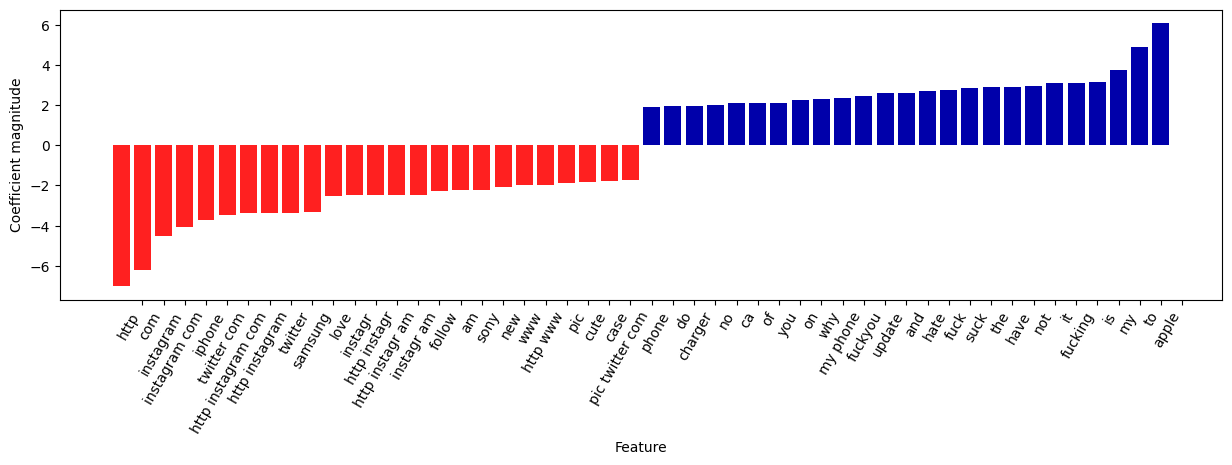

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import mglearn
import numpy as np

# Assuming X contains your text data and y contains the corresponding labels

# Use TfidfVectorizer for feature extraction
TFIDF_pipe = TfidfVectorizer(ngram_range=(1, 3))  # You can adjust ngram_range as needed

# Fit and transform the text data
X_tfidf = TFIDF_pipe.fit_transform(X)

# Fit Logistic Regression on the transformed data
LR = LogisticRegression()
LR.fit(X_tfidf, y)

# Extract feature names
feature_names_tfidf = np.array(TFIDF_pipe.get_feature_names_out())

# Visualize coefficients
mglearn.tools.visualize_coefficients(LR.coef_, feature_names_tfidf, n_top_features=25)


In [ ]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)


In [ ]:
# Unigrams + Bigrams + Trigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords


In [ ]:
print("Dimensions of feature_names:", feature_names.shape)
print("Dimensions of mask:", mask.shape)


In [ ]:

# Assuming CV is your CountVectorizer object
feature_names = np.array(CV.get_feature_names_out())

# Find 3-gram features
mask = np.array([len(feature.split(" ")) == 3 for feature in feature_names])

# Visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)


In [ ]:
len(coef.ravel()), len(feature_names)

In [ ]:
# CV.vocabulary_
data.to_pickle("tweets_cleaned.pkl")
data.head()

#10. Word Embeddings

In [ ]:
tweets_list = list(data['cleaned_tweets_w/o_SW'].apply(lambda x: x.split()))
tweets_list[0] # list of lists, where each tweet is a list of tokens, finally we have a list of tweets


['#',
 'fingerprint',
 '#',
 'Pregnancy',
 'Test',
 'http',
 ':',
 '//goo.gl/h1MfQV',
 '#',
 'android',
 '#',
 'apps',
 '#',
 'beautiful',
 '#',
 'cute',
 '#',
 'health',
 '#',
 'igers',
 '#',
 'iphoneonly',
 '#',
 'iphonesia',
 '#',
 'iphone']

In [ ]:
# Creating your own Word2Vec Model & Train
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)
# summarize the loaded model
print(cbow_model)

Word2Vec<vocab=2962, vector_size=300, alpha=0.025>


In [ ]:
cbow_model.wv.index_to_key[:20]  # this your vocab

['#',
 ':',
 'http',
 '!',
 '.',
 'iphone',
 'I',
 '@',
 ',',
 'my',
 'to',
 'apple',
 'the',
 'a',
 'and',
 'iPhone',
 'it',
 '&',
 'Apple',
 'for']

In [ ]:
len(cbow_model.wv.index_to_key)

2962

In [ ]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

In [ ]:
tweets_temp = data['cleaned_tweets_w/o_SW'].apply(document_vector)

In [ ]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

In [ ]:
tweets_temp[0].shape  # each document vecotr is 300-dimensional !!

In [ ]:
type(tweets_temp)

In [ ]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

In [ ]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(tweets_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))


In [ ]:
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.95 0.16
88.14 0.61


300

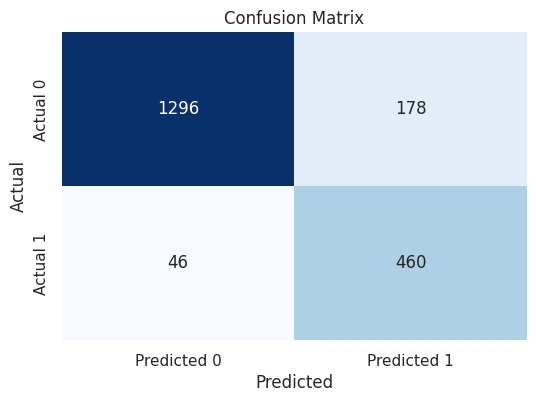


Accuracy: 0.89


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
LR1.fit(X_train,y_train)
y_pred=LR1.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
